In [1]:
from datasets.seg_dataset import load_voc
import torch
colormap = torch.tensor([[0, 0, 0], [250, 50, 83], [51, 221, 255]])
load_type = "testing"
it = load_voc("D:\semantic-segmentation-for-sonar-images\datasets", colormap, load_type, batch_size=8)

d:\semantic-segmentation-for-sonar-images\datasets\utils.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  colormap = torch.tensor(colormap, device=raw_label.device, dtype=raw_label.dtype)  # [C, 3]


In [2]:
# visualize the first batch
for i in it:
    features = i[0]
    labels = i[1]
    break

In [3]:
label = labels[0]
from datasets.utils import classes_to_pic
pic = classes_to_pic(label, colormap)


In [4]:
label.sum()

tensor(3612)

In [5]:
pic.sum()

tensor(951762.)

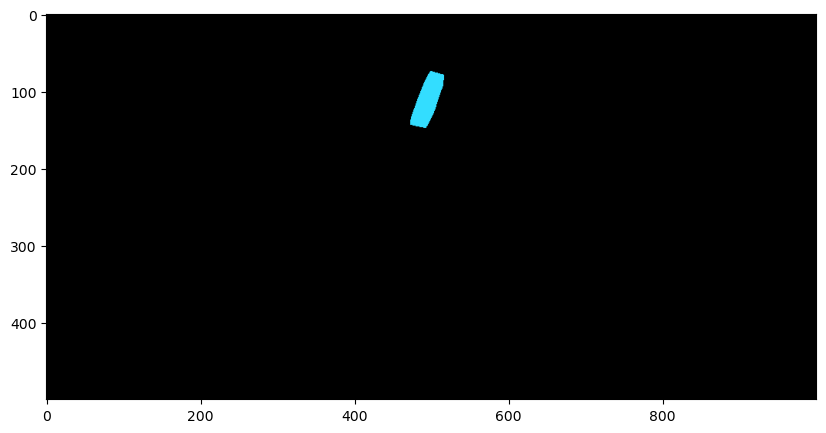

In [6]:
from datasets.utils import plot_images
plot_images(pic.unsqueeze(0))

In [7]:
from datasets.utils import print_non_zeros
print_non_zeros(pic)

非零元素 (通道数=3):
位置 (74, 499): RGB = (51.0, 221.0, 255.0)
位置 (74, 500): RGB = (51.0, 221.0, 255.0)
位置 (74, 501): RGB = (51.0, 221.0, 255.0)
位置 (75, 498): RGB = (51.0, 221.0, 255.0)
位置 (75, 499): RGB = (51.0, 221.0, 255.0)
位置 (75, 500): RGB = (51.0, 221.0, 255.0)
位置 (75, 501): RGB = (51.0, 221.0, 255.0)
位置 (75, 502): RGB = (51.0, 221.0, 255.0)
位置 (75, 503): RGB = (51.0, 221.0, 255.0)
位置 (75, 504): RGB = (51.0, 221.0, 255.0)
位置 (76, 498): RGB = (51.0, 221.0, 255.0)
位置 (76, 499): RGB = (51.0, 221.0, 255.0)
位置 (76, 500): RGB = (51.0, 221.0, 255.0)
位置 (76, 501): RGB = (51.0, 221.0, 255.0)
位置 (76, 502): RGB = (51.0, 221.0, 255.0)
位置 (76, 503): RGB = (51.0, 221.0, 255.0)
位置 (76, 504): RGB = (51.0, 221.0, 255.0)
位置 (76, 505): RGB = (51.0, 221.0, 255.0)
位置 (76, 506): RGB = (51.0, 221.0, 255.0)
位置 (76, 507): RGB = (51.0, 221.0, 255.0)
位置 (76, 508): RGB = (51.0, 221.0, 255.0)
位置 (77, 497): RGB = (51.0, 221.0, 255.0)
位置 (77, 498): RGB = (51.0, 221.0, 255.0)
位置 (77, 499): RGB = (51.0, 221.0, 255.0)
位置

In [13]:
from models.fcn import fcn_model
f = features[0].unsqueeze(0)
fc = fcn_model(3)
y = fc(f)
y_hat = y.argmax(dim = 1)
y_hat

d:\programing\python\envs\ML\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
d:\programing\python\envs\ML\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


tensor([[[1, 2, 0,  ..., 0, 0, 0],
         [2, 2, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 2, 0],
         [0, 0, 0,  ..., 0, 2, 2],
         [0, 0, 0,  ..., 0, 2, 0]]])

In [18]:
y_hat.shape

torch.Size([1, 500, 1000])

In [20]:
pics = classes_to_pic(y_hat[0], colormap)
pics

tensor([[[250.,  51.,   0.,  ...,   0.,   0.,   0.],
         [ 51.,  51.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.,  ...,   0.,  51.,   0.],
         [  0.,   0.,   0.,  ...,   0.,  51.,  51.],
         [  0.,   0.,   0.,  ...,   0.,  51.,   0.]],

        [[ 50., 221.,   0.,  ...,   0.,   0.,   0.],
         [221., 221.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.,  ...,   0., 221.,   0.],
         [  0.,   0.,   0.,  ...,   0., 221., 221.],
         [  0.,   0.,   0.,  ...,   0., 221.,   0.]],

        [[ 83., 255.,   0.,  ...,   0.,   0.,   0.],
         [255., 255.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.,  ...,   0., 255.,   0.],
         [  0.,   0.,   0.,  ...,   0., 255., 255.],
         [  0.,   0.,   0.,  ...,   0., 255.,   0.]]]

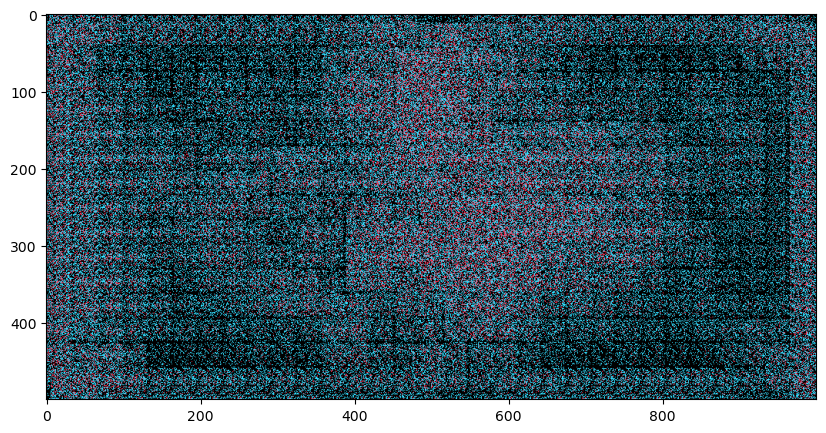

In [21]:
plot_images(pics.unsqueeze(dim=0))